<a href="https://colab.research.google.com/github/SK-Viswa-086/Digital-Portfolio/blob/main/Virat_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
data_set = pd.read_csv('/content/virat.csv')

In [105]:
data_set.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [106]:
data_set.shape

(132, 12)

In [107]:
data_set.columns

Index(['Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns',
       'Opposition', 'Ground', 'Start Date'],
      dtype='object')

In [78]:
is_null = data_set.isnull()

In [79]:
data_set.isnull().sum()

,0
Runs,0
Mins,0
BF,0
4s,0
6s,0
SR,0
Pos,0
Dismissal,0
Inns,0
Opposition,0


In [80]:
data_set['Runs'].unique()

array(['12', '37', '25', '54', '31', '2*', '30', '10', '27', '107', '91',
       '102*', '57', '0', '18', '28', '118', '105', '64', '63*', '2',
       '22', '87*', '100*', '34', '1', '59', '24', '9', '35', '81', '94',
       '7', '112*', '86*', '3', '117', '20', '23*', '80', '21', '66',
       '106', '38', '128*', '23', '6', '15', '77*', '26', '43', '11',
       '102', '115', '14', '68*', '61', '68', '115*', '86', '99', '19',
       '123', '78', '82', '136', '40', '1*', '13', '62', '127', '49',
       '53', '139*', '77', '138', '8', '85*', '154*', '45', '65', '122',
       '55'], dtype=object)

In [81]:
data_set['Runs'].value_counts() # count how many runs in the same number

,count
Runs,
0,10
2,5
37,4
31,4
9,4
...,...
154*,1
45,1
65,1


In [82]:
data_set['Runs'].str.replace('*', ' ') # replact the * to empty space

,Runs
0,12
1,37
2,25
3,54
4,31
...,...
127,45
128,65
129,122
130,8


In [83]:
data_set['Runs'] = pd.to_numeric(data_set['Runs'], errors='coerce')

In [84]:
print(data_set['Runs'].isnull().sum())

17


In [85]:
print(data_set[data_set['Runs'] > 50].shape[0])

40


In [86]:

print(data_set[data_set['Runs'] > 50].count())

Runs          40
Mins          40
BF            40
4s            40
6s            40
SR            40
Pos           40
Dismissal     40
Inns          40
Opposition    40
Ground        40
Start Date    40
dtype: int64


In [87]:
data_set[data_set['Runs']<50].shape[0]

75

In [88]:
data_set[data_set['Runs']<50].count()

,0
Runs,75
Mins,75
BF,75
4s,75
6s,75
SR,75
Pos,75
Dismissal,75
Inns,75
Opposition,75


In [89]:
data_set[data_set['Runs'] > 50]['Opposition'].value_counts()

,count
Opposition,
v West Indies,10
v Australia,7
v New Zealand,6
v Sri Lanka,6
v South Africa,4
v Bangladesh,3
v England,3
v Zimbabwe,1


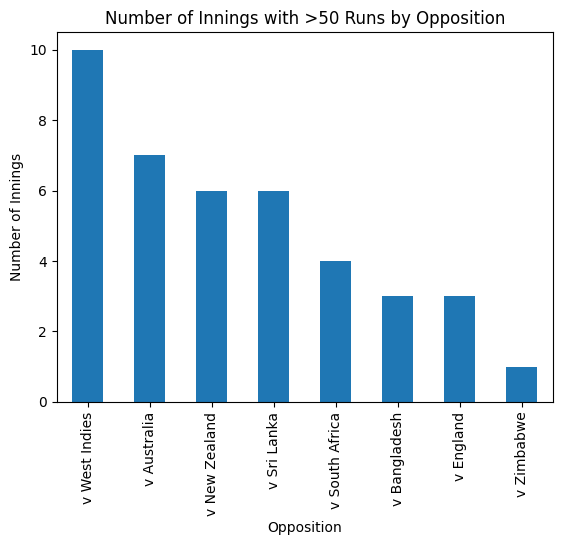

In [90]:
opposition_counts = data_set[data_set['Runs'] > 50]['Opposition'].value_counts()
opposition_counts.plot(kind='bar', title='Number of Innings with >50 Runs by Opposition')
plt.xlabel('Opposition')
plt.ylabel('Number of Innings')
plt.show()

In [91]:
avg_runs = data_set['Runs'].mean()
print(avg_runs)

41.23478260869565


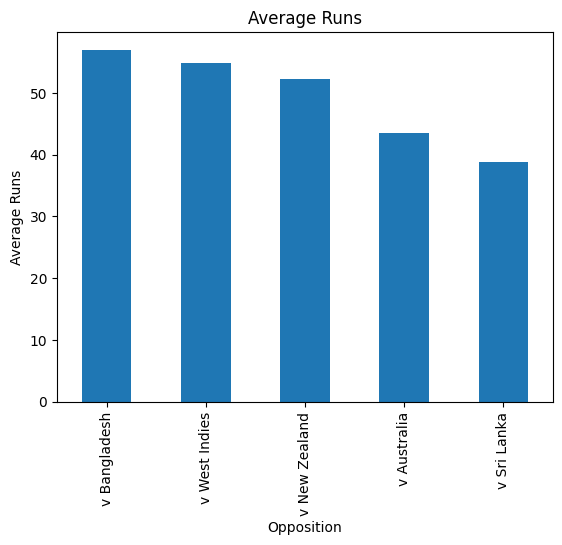

In [92]:
avg_runs = data_set.groupby('Opposition')['Runs'].mean().sort_values(ascending=False).head()
avg_runs.plot(kind='bar', title='Average Runs')
plt.xlabel('Opposition')
plt.ylabel('Average Runs')
plt.show()

In [93]:
fifty_to_99 = data_set[(data_set['Runs'] >= 50) & (data_set['Runs'] < 100)] # total innings between 50 to 99
print(fifty_to_99.shape[0])

25


In [94]:
centuries = data_set[data_set['Runs'] >= 100] # total centuries
print(centuries.shape[0])

15


In [95]:
ducks = data_set[data_set['Runs'] == 0] # no of ducks
print(ducks.shape[0])

10


In [96]:
print("Number of half-centuries:", fifty_to_99.shape[0]) # no of half centuries

Number of half-centuries: 25


In [97]:
data_set['Runs'].max() # high score

138.0

In [98]:
avg_runs = data_set['Runs'].mean() # average overall runs
print(avg_runs)

41.23478260869565


In [99]:
centuries_by_opp = centuries['Opposition'].value_counts() # counts of centuries by opposition
print(centuries_by_opp)

Opposition
v Australia       3
v West Indies     3
v New Zealand     2
v Sri Lanka       2
v England         2
v Zimbabwe        1
v Bangladesh      1
v South Africa    1
Name: count, dtype: int64


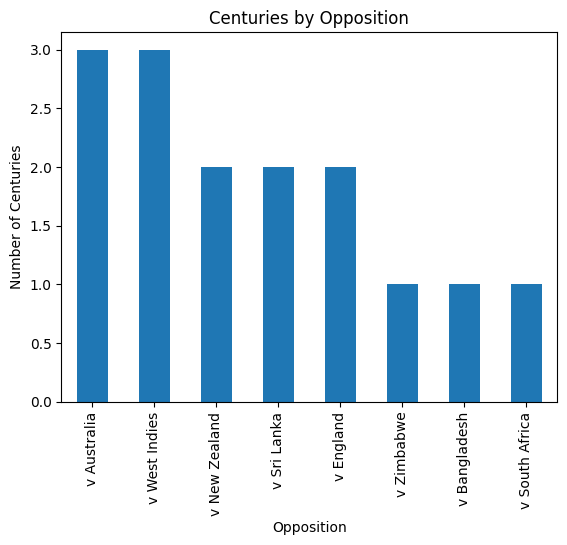

In [100]:
centuries_by_opp.plot(kind='bar', title='Centuries by Opposition')
plt.xlabel('Opposition')
plt.ylabel('Number of Centuries')
plt.show()


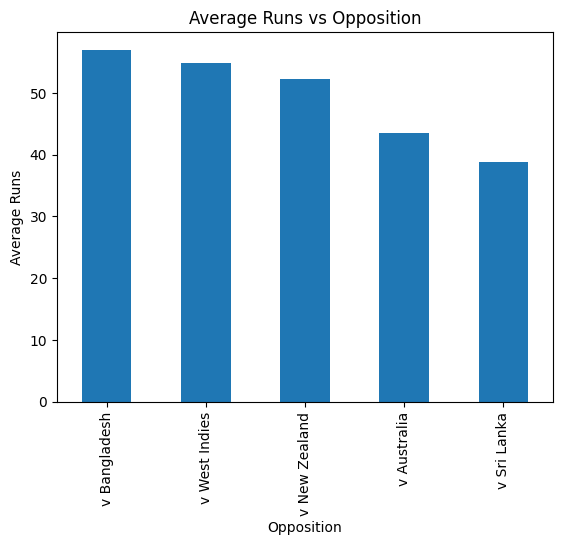

In [101]:
avg_runs_opp = data_set.groupby('Opposition')['Runs'].mean().sort_values(ascending=False).head()
avg_runs_opp.plot(kind='bar', title='Average Runs vs Opposition')
plt.xlabel('Opposition')
plt.ylabel('Average Runs')
plt.show()